<a href="https://colab.research.google.com/github/Adityan1512/Coursework-Codes/blob/main/Predictive_Analysis_ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install arch

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [28]:
# Defining start & end dates
start_date = "2019-01-01"
end_date = "2024-01-01"

# Downloading data from Yahoo Finance
ftse_data = yf.download("^FTSE", start=start_date, end=end_date)
btc_data = yf.download("BTC-USD", start=start_date, end=end_date)
eth_data = yf.download("ETH-USD", start=start_date, end=end_date)

# Keeping only adjusted close prices
ftse_prices = ftse_data['Adj Close']
btc_prices = btc_data['Adj Close']
eth_prices = eth_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
# Priniting number of missing values
print(ftse_prices.isnull().sum(), btc_prices.isnull().sum(), eth_prices.isnull().sum())

0 0 0


In [30]:
# Using log to bring all data to the same scale
ftse_log = np.log(ftse_prices)
btc_log = np.log(btc_prices)
eth_log = np.log(eth_prices)

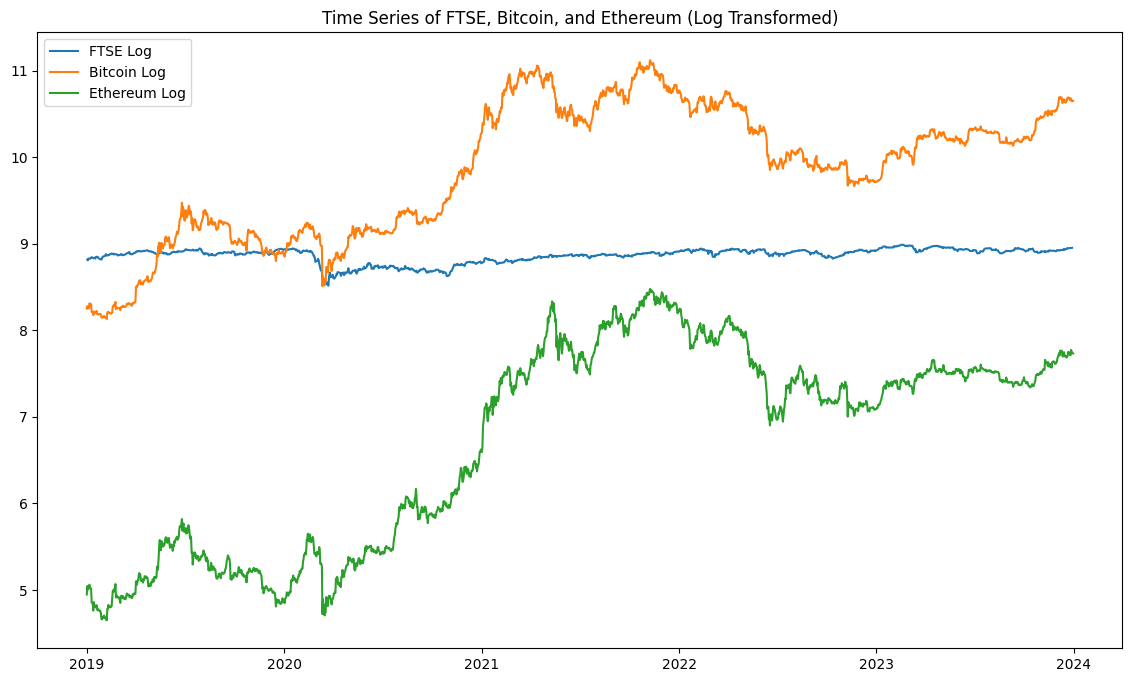

In [31]:
# Time series analysis
plt.figure(figsize=(14, 8))
plt.plot(ftse_log, label='FTSE Log')
plt.plot(btc_log, label='Bitcoin Log')
plt.plot(eth_log, label='Ethereum Log')
plt.legend()
plt.title('Time Series of FTSE, Bitcoin, and Ethereum (Log Transformed)')
plt.show()

In [32]:
# Applying ARIMA model to Bitcoin data
model_btc = ARIMA(btc_log, order=(1, 1, 1))  # Adjust order based on ACF/PACF
result_btc = model_btc.fit()
print(result_btc.summary())

# Applying ARIMA model to Ethereum data
model_eth = ARIMA(eth_log, order=(1, 1, 1))  # Adjust order based on ACF/PACF
result_eth = model_eth.fit()
print(result_eth.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3509.034
Date:                Thu, 09 May 2024   AIC                          -7012.067
Time:                        02:11:26   BIC                          -6995.539
Sample:                    01-01-2019   HQIC                         -7005.970
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5248      0.227     -2.317      0.021      -0.969      -0.081
ma.L1          0.4702      0.234      2.010      0.044       0.012       0.929
sigma2         0.0013    1.3e-05     96.121      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3061.735
Date:                Thu, 09 May 2024   AIC                          -6117.470
Time:                        02:11:29   BIC                          -6100.942
Sample:                    01-01-2019   HQIC                         -6111.373
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7738      0.086     -9.043      0.000      -0.942      -0.606
ma.L1          0.7155      0.095      7.529      0.000       0.529       0.902
sigma2         0.0020   2.35e-05     86.927      0.0

In [33]:
# Applying GARCH model on Bitcoin data
garch_btc = arch_model(btc_log.diff().dropna(), vol='Garch', p=1, q=1)
garch_result_btc = garch_btc.fit()
print(garch_result_btc.summary())

# Applying GARCH model for Ethereum data
garch_eth = arch_model(eth_log.diff().dropna(), vol='Garch', p=1, q=1)
garch_result_eth = garch_eth.fit()
print(garch_result_eth.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 80549846.59037241
Iteration:      2,   Func. Count:     18,   Neg. LLF: -2426.053588186358
Iteration:      3,   Func. Count:     27,   Neg. LLF: -2980.1936793037635
Iteration:      4,   Func. Count:     34,   Neg. LLF: -3481.495171640895
Iteration:      5,   Func. Count:     41,   Neg. LLF: -3534.9698080887392
Iteration:      6,   Func. Count:     47,   Neg. LLF: -3577.7974204506827
Iteration:      7,   Func. Count:     53,   Neg. LLF: -3409.512026931502
Iteration:      8,   Func. Count:     59,   Neg. LLF: -3593.5580796949666
Iteration:      9,   Func. Count:     64,   Neg. LLF: -3593.614715859523
Iteration:     10,   Func. Count:     69,   Neg. LLF: -3593.616652696459
Iteration:     11,   Func. Count:     74,   Neg. LLF: -3593.616647529435
Iteration:     12,   Func. Count:     80,   Neg. LLF: -3593.616648752054
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3593.6166551477836
           

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002058. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


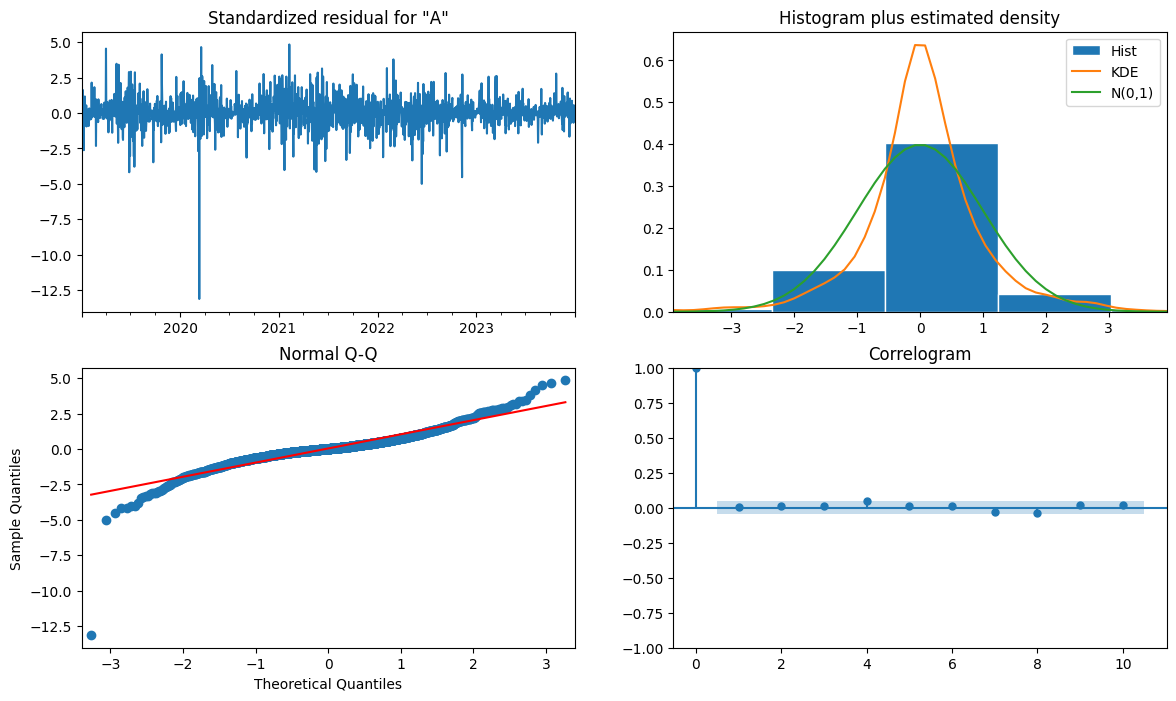

In [34]:
# BITCOIN ARIMA RESULTS
result_btc.plot_diagnostics(figsize=(14, 8))
plt.show()

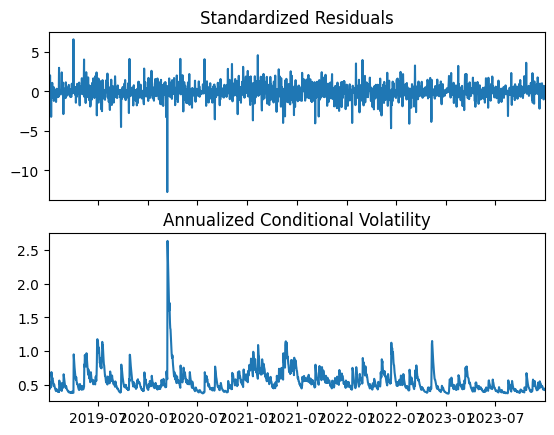

In [35]:
# BITCOIN GARCH RESULTS
garch_result_btc.plot(annualize='D')
plt.show()


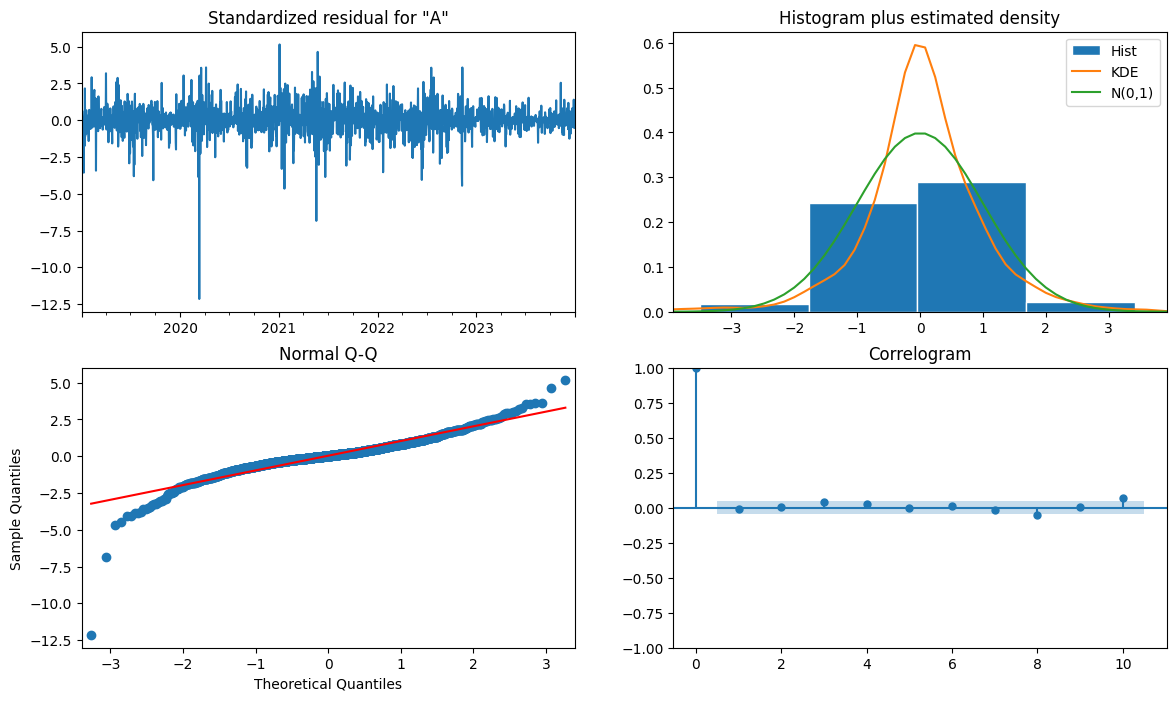

In [36]:
# ETHEREUM ARIMA RESULTS
result_eth.plot_diagnostics(figsize=(14, 8))
plt.show()

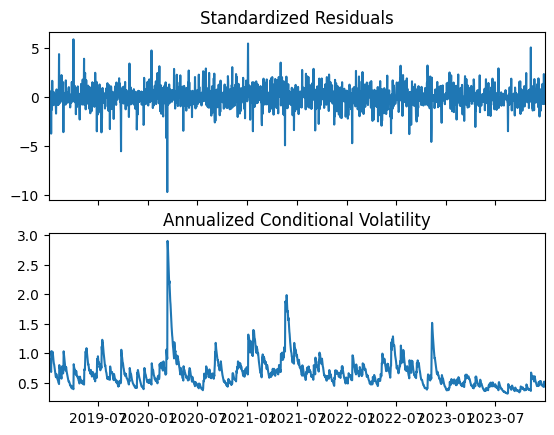

In [37]:
# ETHEREUM GARCH RESULTS
garch_result_eth.plot(annualize='D')
plt.show()